In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
coinhist = pd.read_csv("data/NaICoin_HE_Gamma7.6-11.2_105hrs.txt", skiprows=1, engine='python', names=['Energy','Counts'], \
                         delim_whitespace=False)
print (coinhist.head(10))

   Energy   Counts
0  0.0550  35.0568
1  0.0644  11.0469
2  0.0748  14.0187
3  0.0862  11.0453
4  0.0945   6.0141
5  0.1038   2.9646
6  0.1142   6.9273
7  0.1246   5.0972
8  0.1340   8.0691
9  0.1433   7.0013


In [3]:
coinE = np.asarray(coinhist['Energy'],dtype=float)
coinN = np.asarray(coinhist['Counts'],dtype=float)



print(np.shape(coinE))
print(np.shape(coinN))

(95,)
(95,)


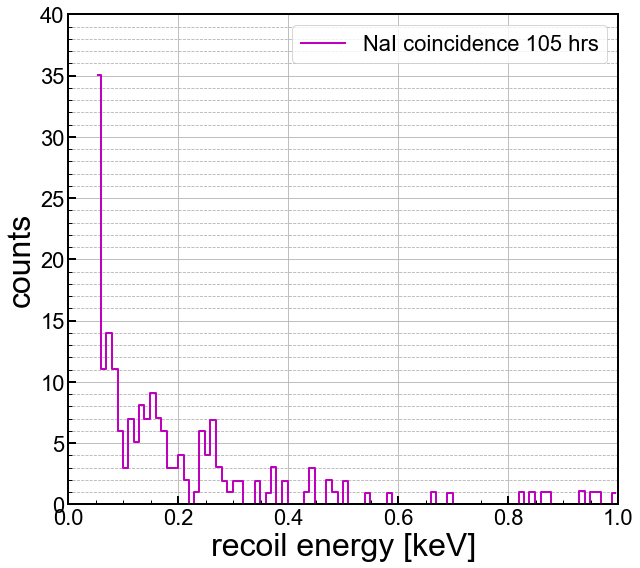

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [15]:
#get mass of silicon nucleus
# double delnuc = getDelta(isotope);
#  double deln = 8.071;
#  double melec = 0.510998;
#  double mnbar = 931.494045;
#  double mnuc = (getN(isotope)+getZ(isotope))*mnbar + delnuc -getZ(isotope)*melec;

#deltas
# else if(isotope=="28Si")
#    return -21.493;
#  else if(isotope=="29Si")
#    return -21.895;
#  else if(isotope=="30Si")
#    return -24.433;
# else if(isotope=="32Si")
#    return -24.081;
    
del29Si = -21.895
melec = 0.510998
mnbar = 931.494045
m29Si = (15+14)*mnbar + del29Si -14*melec
print(m29Si)

del30Si = -24.433
m30Si = (16+14)*mnbar + del30Si -14*melec
#gammas neutron separation energies
#  else if(isotope=="28Si")
#    return 17.17972;
#  else if(isotope=="29Si")
#    return 8.47356;
#  else if(isotope=="30Si")
#    return 10.60924;
#  else if(isotope=="31Si")
#    return 6.58740;
#  else if(isotope=="32Si")
#    return 9.2000;
#  else if(isotope=="33Si")
#    return 4.5080;

Sn29Si = 8.47356
Sn30Si = 10.60924

26984.278333000002


In [16]:
#E = pow((Sn-(Elev[0]/1000.0)),2.0)/(2*(getMass(isoname)+(Elev[0]/1000.0)));
E29Si = (Sn29Si**2/(2*m29Si))*(1000)
print(E29Si)
E30Si = (Sn30Si**2/(2*m30Si))*(1000)
print(E30Si)

1.3304268913093709
2.016175765469725


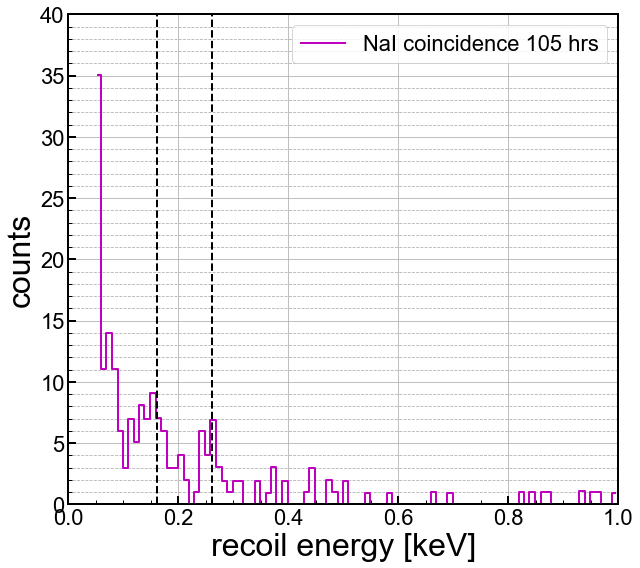

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*0.122,color='k',linestyle="--")
plt.axvline(x=E30Si*0.13,color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [46]:

def prob_func(E):
    
  #deltas for masses
  prob_Sn29Si = 8.47356
  prob_Sn30Si = 10.60924
    
  prob_del29Si = -21.895
  prob_melec = 0.510998
  prob_mnbar = 931.494045
  prob_m29Si = (15+14)*prob_mnbar + prob_del29Si -14*prob_melec


  prob_del30Si = -24.433
  prob_m30Si = (16+14)*prob_mnbar + prob_del30Si -14*prob_melec
    
  prob_E29Si = (prob_Sn29Si**2/(2*prob_m29Si))*(1000)

  prob_E30Si = (prob_Sn30Si**2/(2*prob_m30Si))*(1000)
    
  Escale = 0.1 # 100 eV  
  expdecay = (1/Escale)*np.exp(-(E/Escale))

  w1 =0.01 #width of first gaussian
  y1 = 0.122
  mu1 = prob_E29Si*y1
  g1 = (1/(w1*np.sqrt(2*np.pi)))*np.exp(-(E-mu1)**2/(2*w1**2))
    
  w2 =0.01 #width of first gaussian
  y2 = 0.13
  mu2 = prob_E30Si*y2
  g2 = (1/(w2*np.sqrt(2*np.pi)))*np.exp(-(E-mu2)**2/(2*w2**2))
    
  flat=0.05
    
  return 0.85*expdecay+0.1*(0.9*g1+0.1*g2)+flat

a = np.asarray([0.1,0.2])
print(prob_func(a))
    

[3.17697526 1.20330682]


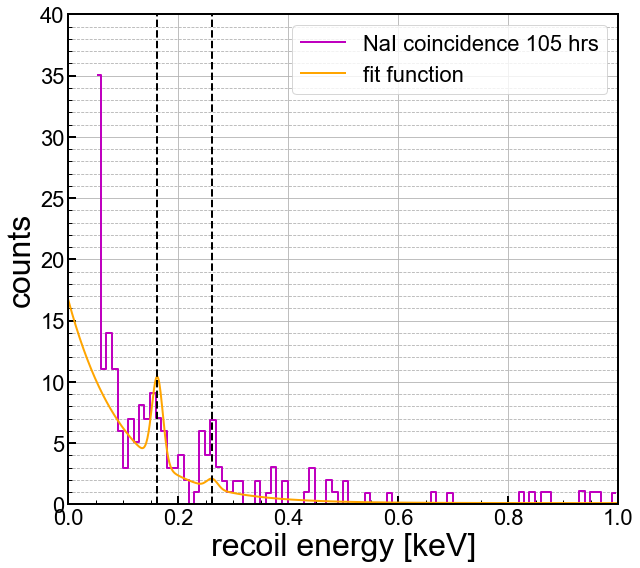

In [50]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

evec = np.linspace(0.0,1,num=1000)

ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)
ax1.plot (evec, np.sum(coinN)*prob_func(evec)*0.01, color='orange',linestyle='-', label='fit function')

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*0.122,color='k',linestyle="--")
plt.axvline(x=E30Si*0.13,color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()